In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
one_hot_encoding = False

In [3]:
# Read full dataset
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/Xtrain_hgcGIrA.csv')
df_y = pd.read_csv('/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/Ytrain_yL5OjS4.csv')

# Join x and y
df['p0q0'] = df_y.p0q0

In [4]:
df.describe(include='all')

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
count,31119,31119.000000,31119.0,31119,27915,31119.000000,29067.000000,26974.000000,24935.000000,27917.000000,24720.000000,21527.000000,31119.000000
unique,74,NaN,NaN,36,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-05-07,NaN,NaN,AJ,07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,527,NaN,NaN,3204,10064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,27.067965,0.0,NaN,NaN,1.999647,0.234769,0.251392,0.316867,0.207200,0.222167,0.209845,0.248754
std,NaN,15.979186,0.0,NaN,NaN,0.018798,0.166153,0.143506,0.150974,0.134709,0.147600,0.144858,0.157367
min,NaN,1.000000,0.0,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.004000,0.004000,0.004000,0.000000
25%,NaN,13.000000,0.0,NaN,NaN,2.000000,0.094000,0.136000,0.196000,0.099000,0.107000,0.100000,0.121000
50%,NaN,26.000000,0.0,NaN,NaN,2.000000,0.192000,0.230000,0.312000,0.181000,0.188000,0.172000,0.220000
75%,NaN,41.000000,0.0,NaN,NaN,2.000000,0.363000,0.354000,0.420000,0.294000,0.322000,0.292000,0.360500


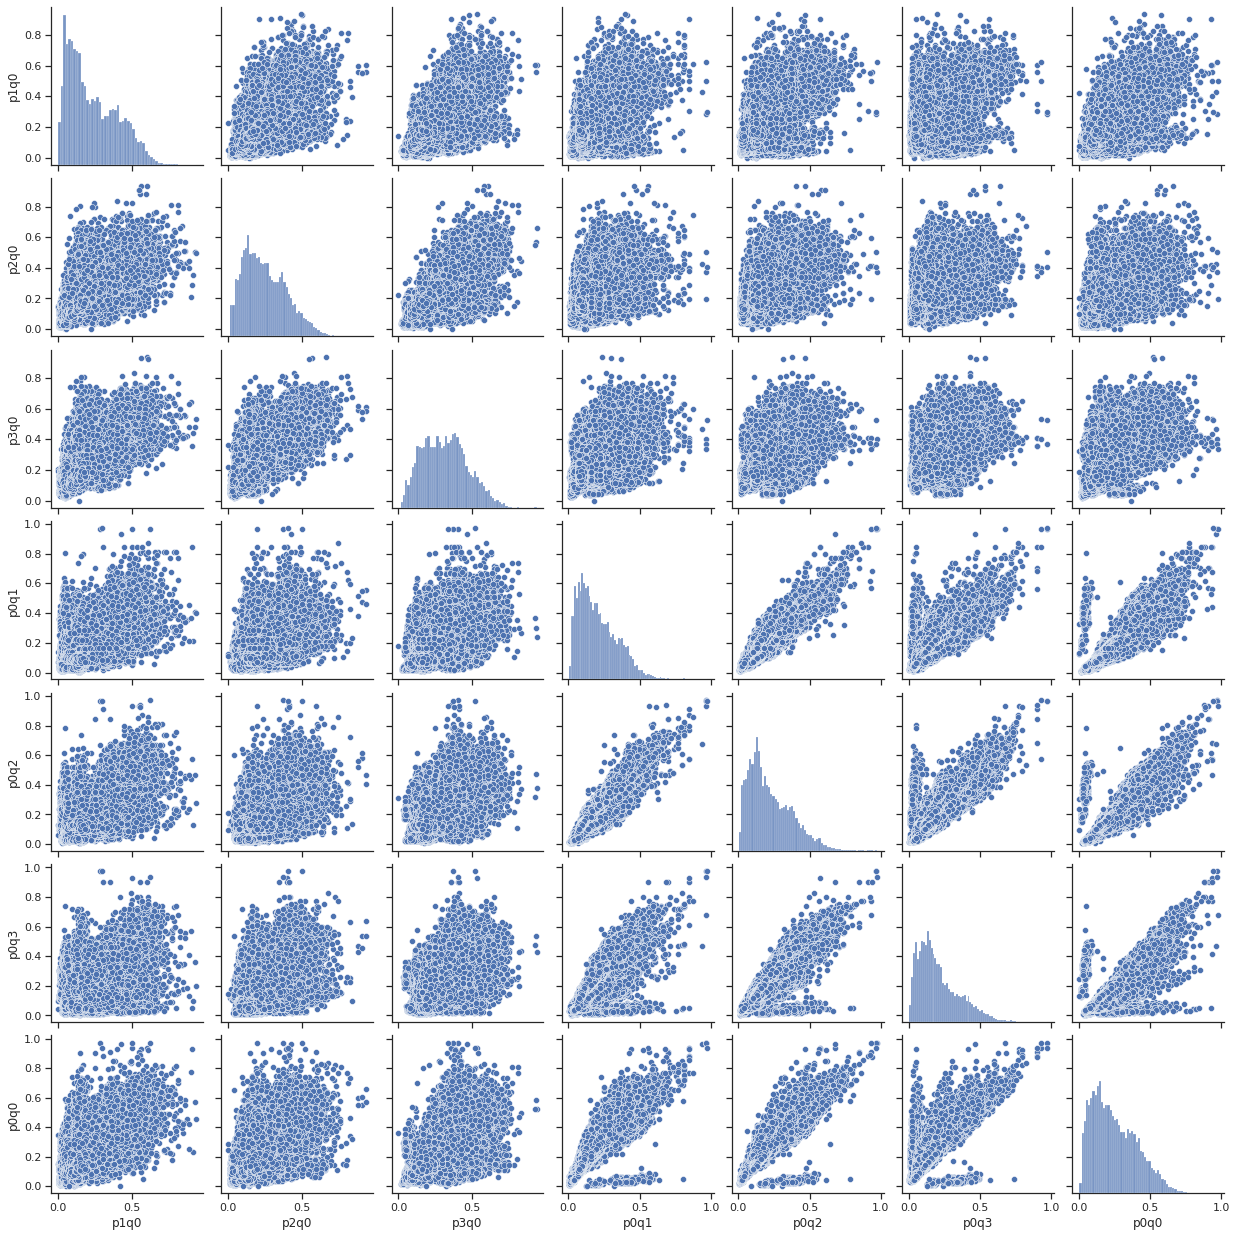

In [5]:
sns.set_theme(style="ticks")
sns.pairplot(df.iloc[:,6:])

<AxesSubplot:>

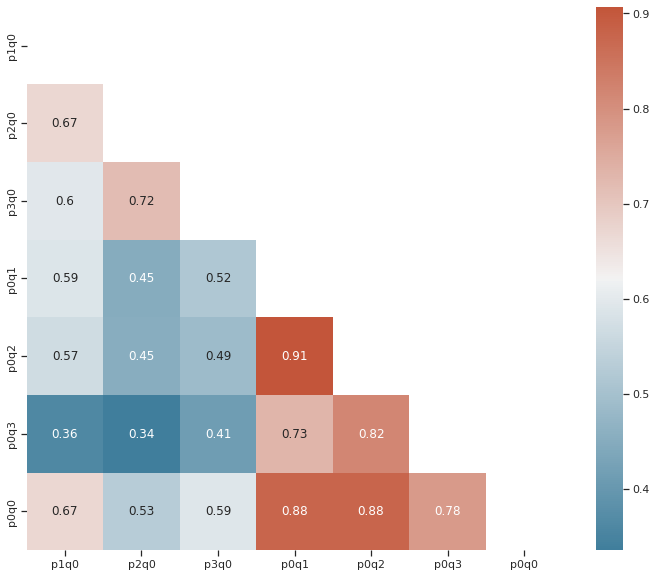

In [6]:
corr = df.iloc[:,6:].corr()

f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [7]:
# Remove rows for 11:00am (2 rows)
df.drop(df[df.hour == '11:00:00'].index, inplace=True)

df['p1q0'] = df['p1q0'].fillna(0)
df['p2q0'] = df['p2q0'].fillna(0)
df['p3q0'] = df['p3q0'].fillna(0)
df['p0q1'] = df['p0q1'].fillna(0)
df['p0q2'] = df['p0q2'].fillna(0)
df['p0q3'] = df['p0q3'].fillna(0)


# Adding day name column
df['day'] = pd.to_datetime(df['date']).dt.day_name()

# Adding day name column
df['month'] = pd.to_datetime(df['date']).dt.month_name()


In [8]:
sns.set_theme(style="darkgrid", palette='pastel')

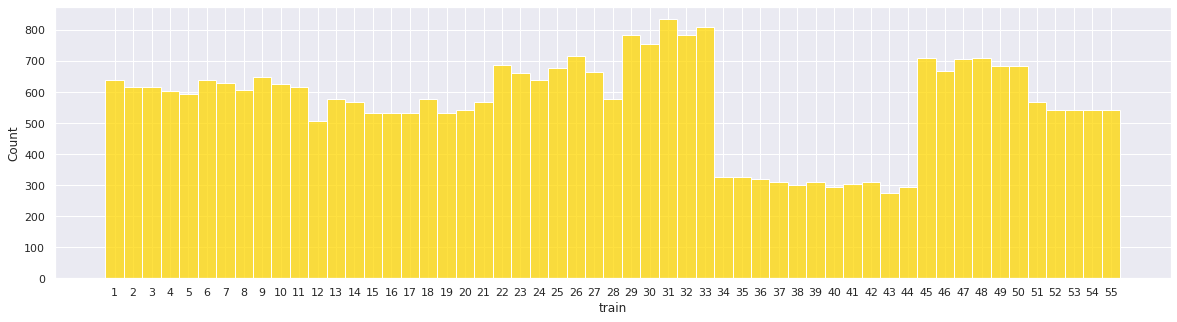

In [9]:
fig, axs = plt.subplots(figsize=(20, 5))

trains = df.train.sort_values(ascending=True).astype(str)

sns.histplot(data=trains, kde=False, color="gold")

plt.show()

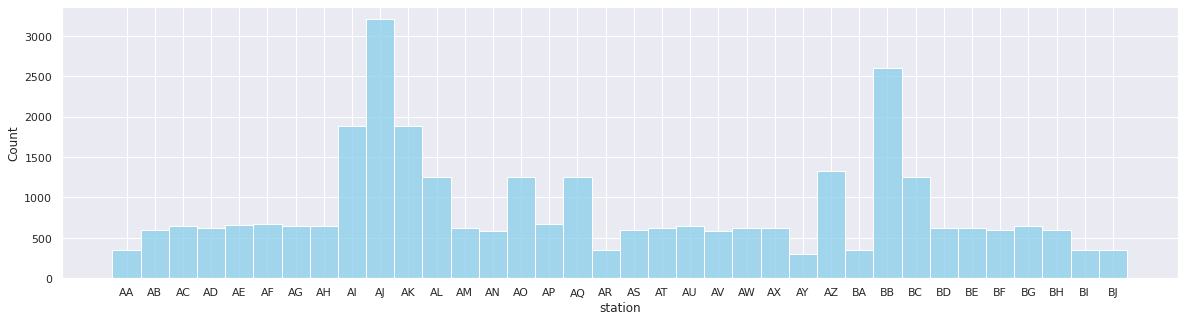

In [10]:
fig, axs = plt.subplots(figsize=(20, 5))
stations = df.station.sort_values(ascending=True)
sns.histplot(data=stations, kde=False, color="skyblue")
plt.show()

In [11]:
df.station.nunique()

36

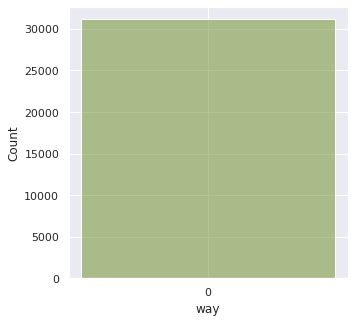

In [12]:
fig, axs = plt.subplots(figsize=(5, 5))
sns.histplot(data=df.way.astype(str), kde=True, color="olivedrab")
plt.show()

In [13]:
df.way.value_counts()

0    31117
Name: way, dtype: int64

In [14]:
# Search for empty rows without hour values
df.hour.isnull().sum()

3204

In [15]:
# Fill with the nearest hour value
df['hour'].fillna(method='ffill', inplace=True)

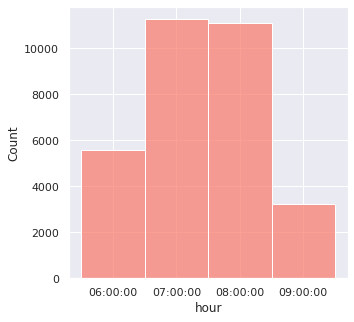

In [16]:
fig, axs = plt.subplots(figsize=(5, 5))

hours = df.hour 

sns.histplot(data=hours, kde=False, color="salmon")

plt.show()

In [17]:
df.hour.value_counts()

07:00:00    11234
08:00:00    11081
06:00:00     5566
09:00:00     3236
Name: hour, dtype: int64

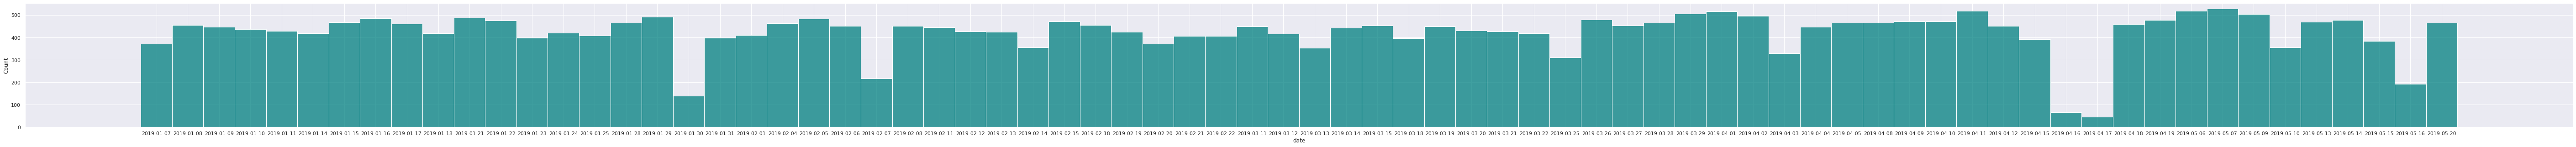

In [18]:
fig, axs = plt.subplots(figsize=(100, 5))

dates = df.date.sort_values(ascending=True)  

sns.histplot(data=dates, kde=False, color="teal")

plt.show()

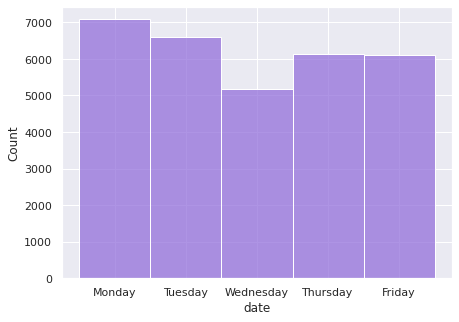

In [19]:

fig, axs = plt.subplots(figsize=(7, 5))

date_= pd.to_datetime(df['date']).sort_values(ascending=True)

day_of_week = date_.dt.day_name()

sns.histplot(data=day_of_week, kde=False, color="mediumpurple")

plt.show()

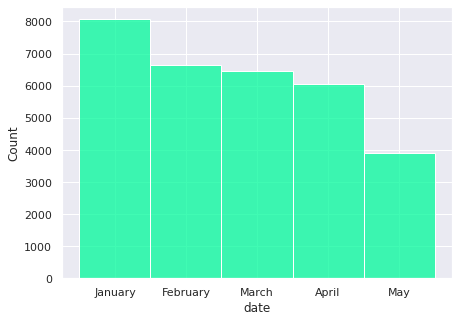

In [20]:
fig, axs = plt.subplots(figsize=(7, 5))

date_= pd.to_datetime(df['date']).sort_values(ascending=True)

month_of_week = date_.dt.month_name()

sns.histplot(data=month_of_week, kde=False, color="mediumspringgreen")

plt.show()

In [21]:
# How many trains are long trains
df.composition.value_counts()

2    31106
1       11
Name: composition, dtype: int64

In [22]:
df.drop(columns=['composition','way','date'],inplace=True)

In [23]:
df.head(5)


,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,day,month
0,1,AD,06:00:00,0.0,0.0,0.0,0.201,0.138,0.091,0.216,Monday,January
1,1,AD,06:00:00,0.0,0.0,0.0,0.204,0.152,0.106,0.216,Tuesday,January
2,1,AD,06:00:00,0.0,0.0,0.0,0.213,0.153,0.111,0.227,Thursday,January
3,1,AD,06:00:00,0.0,0.0,0.0,0.213,0.152,0.108,0.229,Friday,January
4,1,AD,06:00:00,0.0,0.0,0.0,0.210,0.147,0.096,0.225,Monday,January


**TRAIN AND TEST SPLIT**

In [27]:
if(one_hot_encoding == False):

    # Order columns
    df = df[['month','day', 'hour', 'train', 'station', 'p1q0', 'p2q0','p3q0','p0q1','p0q2','p0q3','p0q0']]

    # without one hot encoding
    train = df[ (df['month'] == 'January')  | (df['month'] == 'February') | (df['month'] == 'March')] 
    test = df[ (df['month'] == 'April')  | (df['month'] == 'May')]

    train.to_csv("/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/train.csv",index=False)
    test.to_csv("/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/test.csv",index=False)

In [24]:
# Load the original splits without one hot encoding
train = pd.read_csv('/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/train.csv')
test = pd.read_csv('/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/test.csv')

In [25]:
X_train = train.iloc[:,0:-1]
y_train = train.p0q0

X_test = test.iloc[:,0:-1]
y_test = test.p0q0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21165, 11) (21165,)
(9952, 11) (9952,)


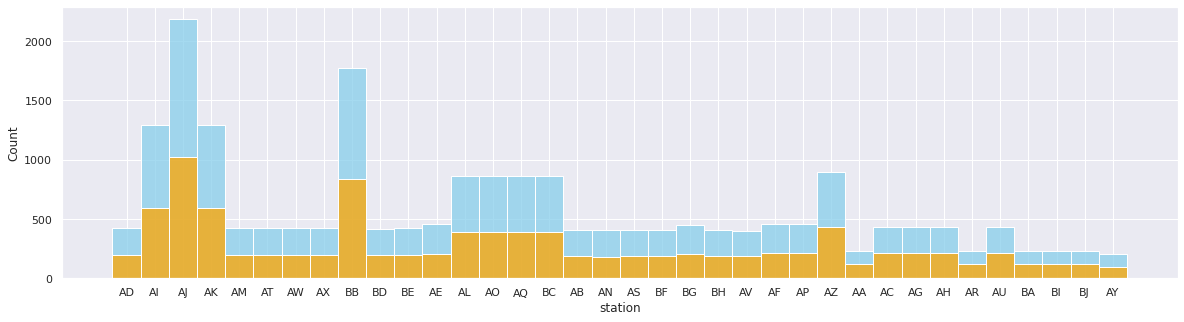

In [26]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(data=train['station'], label = "train", color="skyblue")
sns.histplot(data=test['station'], label = "test", color ="orange")
plt.show()

In [ ]:
if(one_hot_encoding == True):
    
    df.train = df.train.astype('object', copy=True, errors='raise')

    df = pd.get_dummies(df)

    # With one hot encoding
    train = df[ (df['month_January'] == 1)  | (df['month_February'] == 1) | (df['month_March'] == 1)] 
    test = df[ (df['month_April'] == 1)  | (df['month_May'] == 1)]

    train.to_csv("/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/train-ohe.csv",index=False)
    test.to_csv("/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/test-ohe.csv",index=False)